# BITS F312 | NNFL | Python Tutorial

Adapted from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).

## Introduction

In these two days we will cover a few essential tools required by data-scientists, machine-learning engineers and NNFL students

In today's session, we will cover:

* Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Object Oriented and Functional Programming
* Other Useful Pointers and Guidelines

## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [124]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


or, we could just do this

In [125]:
sorted([3,6,8,10,1,2,1])

[1, 1, 2, 3, 6, 8, 10]

It internally uses an algorithm called 'Timsort' for sorting.

### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [126]:
x = 3

In [127]:
type(x)

int

In [128]:
print(x + 1)   # Addition;
print(x - 1)   # Subtraction;
print(x * 2)   # Multiplication;
print(x ** 2)  # Exponentiation;

4
2
6
9


In [129]:
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"

4
8


In [130]:
y = 2.5
print(type(y)) # Prints "<type 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [131]:
t, f = True, False
print(type(t)) # Prints "<type 'bool'>"

<class 'bool'>


Yes, we can assign like that :D

In [132]:
a = 1
b = 2

In [133]:
a,b = b,a

In [134]:
print(a,b)

2 1


Now we let's look at the operations:

In [135]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### Strings

In [136]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print(hello), len(hello)

hello


(None, 5)

In [137]:
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"

hello world


String objects have a bunch of useful methods; for example:

In [138]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                               # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/2/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [139]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [140]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)


[3, 1, 'foo']


In [141]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

[3, 1, 'foo', 'bar']


In [142]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

bar [3, 1, 'foo']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/2/tutorial/datastructures.html#more-on-lists).

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [143]:
nums = list(range(5))    # range is a built-in function that creates a list of integers
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Loops

You can loop over the elements of a list like this:

In [144]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [145]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))

#1: cat
#2: dog
#3: monkey


#### List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [150]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

List comprehensions also offer a small speedup.

In [151]:
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [153]:
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [154]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [155]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

wet


In [156]:
del d['fish'] 

In [157]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

In [158]:
print(d.get('monkey'))

None


In [159]:
print(d.get('monkey', 'Not there :('))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'You recently deleted it!'))    # Get an element with a default; prints "wet"

Not there :(
You recently deleted it!


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

It is easy to iterate over the keys in a dictionary:

In [160]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


If you want access to keys and their corresponding values, use the iteritems method:

In [161]:
print(d.items())

dict_items([('person', 2), ('cat', 4), ('spider', 8)])


In [162]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [163]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


#### Sets

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [164]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

True
False


In [165]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [166]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))

3
2


_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [167]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: fish
#2: cat
#3: dog


Set comprehensions: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [168]:
from math import sqrt
print({int(sqrt(x)) for x in list(range(30))})

{0, 1, 2, 3, 4, 5}


#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [169]:
d = {(x, x + 1): x for x in list(range(10))}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])       
print(d[(1, 2)])

<class 'tuple'>
5
1


In [177]:
t[0] = 1 # Error because they are immutabLe

TypeError: 'tuple' object does not support item assignment

#### ZIP

In [4]:
numbers = [1, 2, 3]
words = ['one', 'two', 'three']

# Two iterables are passed
result = zip(numbers, words)

# Converting itertor to set
resultList = list(result)

print(resultList)

[(1, 'one'), (2, 'two'), (3, 'three')]


In [5]:
numbers = [1, 2, 3]
lower_words = ['one', 'two']
upper_words = ('ONE', 'TWO', 'THREE', 'FOUR')

result = zip(numbers, lower_words)

# Converting to set
resultSet = set(result)
print(resultSet)

result = zip(numbers, lower_words, upper_words)

# Converting to set
resultSet = set(result)
print(resultSet)

{(1, 'one'), (2, 'two')}
{(1, 'one', 'ONE'), (2, 'two', 'TWO')}


#### UNZIP

In [6]:
coordinate = ['x', 'y', 'z']
value = [3, 4, 5, 0, 9]

result = zip(coordinate, value)
resultList = list(result)
print(resultList)

c, v =  zip(*resultList)
print('c =', c)
print('v =', v)

[('x', 3), ('y', 4), ('z', 5)]
c = ('x', 'y', 'z')
v = (3, 4, 5)


### Functions

Python functions are defined using the `def` keyword. For example:

In [178]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [179]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s' % name.upper())
    else:
        print('Hello, %s!' % name)

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


In [180]:
def myFun(*argv):  
    for arg in argv:  
        print(arg) 


In [181]:
w = "Welcome"
myFun(w, ' to ', 'CS F' , 312)  

Welcome
 to 
CS F
312


In [182]:
def myFun(*argv):  
    for arg in argv:  
        print(arg,end='')

In [6]:
coordinate = ['x', 'y', 'z']
value = [3, 4, 5, 0, 9]

result = zip(coordinate, value)
resultList = list(result)
print(resultList)

c, v =  zip(*resultList)
print('c =', c)
print('v =', v)

[('x', 3), ('y', 4), ('z', 5)]
c = ('x', 'y', 'z')
v = (3, 4, 5)


### Our Fancy Random Number Generator

In [2]:
M = 17969491597941066732916128449573246156367561808012600070888918835531726460341490933493372247868650755230855864199929221814436684722874052065257937495694348389263171152522525654410980819170611742509702440718010364831638288518852689
def blum_blum_shub():
    global M
    x = 987654321
    while True:
        x =  (x**2)%M
        yield round(x/M,3)
        
random = blum_blum_shub()

# Load Existing Python File

In [ ]:
# %load a.py
counter = 0
def get():
    global counter
    counter += 1
    return counter-1


## Revisit Concepts using an Example

In [9]:
! pip install names


  Using cached https://files.pythonhosted.org/packages/44/4e/f9cb7ef2df0250f4ba3334fbdabaa94f9c88097089763d8e85ada8092f84/names-0.3.0.tar.gz
  Running setup.py bdist_wheel for names ... done
  Stored in directory: /Users/Vikram/Library/Caches/pip/wheels/f9/a5/e1/be3e0aaa6fa285575078fa2aafd9959b45bdbc8de8a6803aeb
Successfully built names
You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import names
import csv
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline

def get_name():
    return names.get_first_name()
def range_random(l,u):
    return round(l+(u-l)*next(random),3)

## Definition of a Student

In [11]:
class Student():
    name = None
    age = None
    gender = None
    grade = None
    def __init__(self, age, name, grade):
        self.age = age
        self.name = name
        self.grade = grade

## Definition of a EEE Student

In [12]:
class EEE_Student(Student):
    """
    A EEE student: behaves exactly like a Student 
    but also has a special discipline class attribute and a couple courses
    """
    discipline = "A3"
    courses = ["Control Systems, Optimisation"]
    def __init__(self, age, name):
        super().__init__(age, name, range_random(5,9))

## Definition of a CSE Student

In [13]:
class CSE_Student(Student):
    """
    A CSE student: behaves exactly like a Student 
    but also has a special discipline class attribute and a couple courses
    """
    discipline = "A7"
    courses = ["Data Structures, OOP"]
    def __init__(self, age, name):
        super().__init__(age, name, range_random(6,10))

__Generate List of Students__

In [14]:
cse_students = [CSE_Student(range_random(18,23), get_name()) for i in range(0,100000)]
eee_students = [EEE_Student(range_random(18,23), get_name()) for i in range(0,100000)]

In [15]:
len(cse_students)

100000

In [16]:
len(eee_students)

100000

__Concat List of Students__

In [17]:
all_students = cse_students+eee_students

In [18]:
len(all_students)

200000

__Get Student Names with Count__

In [19]:
name_counts = {}
def update_dict(name):
    global name_counts
    name_counts[name] = name_counts.get(name, 0)+1
    
compute_name_counts = list(map(lambda x: update_dict(x.name), all_students))

In [20]:
name_counts

{'Albert': 347,
 'Steven': 851,
 'Anne': 252,
 'Tara': 118,
 'Carol': 662,
 'Elizabeth': 1009,
 'Lynn': 207,
 'Brenda': 484,
 'Judy': 320,
 'Alfredo': 64,
 'Paula': 230,
 'Annette': 132,
 'John': 3680,
 'Patricia': 1280,
 'Arnold': 81,
 'Roy': 309,
 'Janie': 56,
 'Josephine': 187,
 'Joseph': 1613,
 'Dan': 103,
 'Theresa': 316,
 'Tommie': 33,
 'Jeffery': 207,
 'Sherry': 187,
 'Anthony': 884,
 'Arlene': 88,
 'Jeremy': 291,
 'Todd': 233,
 'Dale': 203,
 'Roman': 29,
 'Violette': 3,
 'Ernest': 248,
 'Mary': 2871,
 'Drew': 30,
 'Melinda': 112,
 'Duane': 83,
 'Katherine': 343,
 'Arthur': 371,
 'Sandra': 699,
 'Bradley': 190,
 'Cory': 87,
 'Jason': 738,
 'Elsie': 125,
 'Cecile': 19,
 'Juanita': 190,
 'Jerry': 477,
 'Timothy': 686,
 'Andrea': 264,
 'Willie': 407,
 'Kathleen': 483,
 'Candice': 55,
 'Lauren': 179,
 'Emory': 7,
 'Rafael': 102,
 'Randy': 276,
 'Glen': 106,
 'Augusta': 11,
 'James': 3683,
 'David': 2619,
 'Terrance': 60,
 'Edward': 832,
 'Allen': 183,
 'Patrick': 434,
 'Donna': 624,

In [21]:
## The following line will take a long time to compute, can you guess why?
# name_repeats = reduce(lambda new_dict,x: dict(list(new_dict.items())+[(x.name,new_dict.get(x.name,0)+1)]), all_students, {} )

## Get List of Students Containing Unique Names

__A Purely Imperative Approach__

In [22]:
unique_names = set()
students_with_unique_names = []
for student in all_students:
    if student.name in unique_names:
        continue
    students_with_unique_names.append(student)
    unique_names.add(student.name)

In [23]:
len(students_with_unique_names)

4674

__Alternate Approch w/ Functional Operators__

In [28]:
''' map out the features/parameters which need to be evaluated upon '''
student_and_names = dict(map(lambda x: (x.name, x), all_students))

''' remap the set of names to a list of student objects '''
uniquely_named_students = list(map(lambda x: student_and_names[x], student_and_names))

In [29]:
print(len(uniquely_named_students))

4674


## Get a Sorted List of Students with CG > 9.5

__Approach 1: Filter followed by Sort__

In [119]:
meritorious_students = list(filter(lambda x: x.grade>9.5, all_students))
sorted_meritorious_students1 = sorted(meritorious_students, key=lambda x:x.grade, reverse=True)

__Approach 2: Sort followed by Filter__

In [121]:
sorted_students = sorted(all_students, key=lambda x:x.grade, reverse=True)
sorted_meritorious_students2 = list(filter(lambda x: x.grade>9.5, sorted_students))

*Why did the first approach take less time?*

## Compare the Average Grade of CSE Students and EEE Students

In [23]:
cse_average_grade = reduce(lambda x,y: x+y,map(lambda x: x.grade, filter(lambda x: x.discipline=="A7", all_students)))/len(cse_students)

In [24]:
cse_average_grade

8.00307507999992

In [25]:
eee_average_grade = reduce(lambda x,y:("",x[1]+y[1]), filter(lambda x: x[0]=="A3", map(lambda x:(x.discipline,x.grade),all_students)))[1]/len(eee_students)

In [26]:
eee_average_grade

6.9982245599999535

## CSV File

In [27]:
unrolled_data = list(map(lambda x: (x.name, x.discipline, x.grade, x.courses), all_students))

In [28]:
with open('students.csv', 'w') as studentsCsvFile:
    writer = csv.writer(studentsCsvFile)
    writer.writerow(("Name","Discipline","Grade","Courses"))
    writer.writerows(unrolled_data)

## Pickle File

In [29]:
file = open('important', 'wb')

pickle.dump(all_students,file)

file.close()

# Next Section

## Why NumPy

### Lists vs Arrays



In [40]:
import numpy as np

list_1 = range(500000)
list_2 = range(500000)

array_1 = np.arange(500000)
array_2 = np.arange(500000)

We'll compare time taken for list operations and NumPy array operations

In [47]:
import time

start = time.time()

sum_list = [a+b for a,b in zip(list_1,list_2)]

end = time.time()

print("Time taken: ",end - start)



Time taken:  0.05448508262634277


In [48]:
start = time.time()

sum_array = array_1 + array_2

end = time.time()
print("Time taken: ",end - start)



Time taken:  0.0026819705963134766


***There's a significant difference in the two times (roughly a factor of 20)***

## Why Pandas

In [201]:
df = pd.read_csv("./students.csv", header=0)
df.head(5)

,Name,Discipline,Grade,Courses
0,Linda,A7,6.000,"['Data Structures, OOP']"
1,Beatrice,A7,6.000,"['Data Structures, OOP']"
2,Shaun,A7,8.296,"['Data Structures, OOP']"
3,Rose,A7,8.232,"['Data Structures, OOP']"
4,Bryan,A7,7.760,"['Data Structures, OOP']"


In [202]:
df.shape

(200000, 4)

In [203]:
df.describe()

,Grade
count,200000.000000
mean,7.500650
std,1.258101
min,5.000000
25%,6.504000
50%,7.496000
75%,8.500000
max,10.000000


## Why Matplotlib

In [44]:
grades = sorted(list(map(lambda x: x.grade, filter(lambda x:x.name,all_students))))

NameError: name 'all_students' is not defined

In [45]:
plt.plot(grades,'ro')
plt.axis([0, 200000, 4, 10])
plt.show()

NameError: name 'plt' is not defined

In [206]:
grade_age = [(x.grade, x.age) for x in all_students]

In [207]:
x,y = zip(*grade_age)

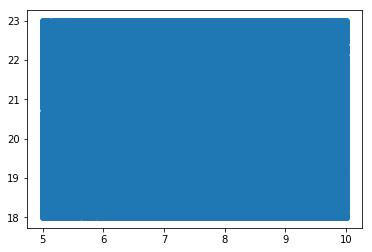

In [208]:
plt.scatter(x=x, y=y)

In [89]:
grade_age = list(filter(lambda x: x[1]/x[0] <2, grade_age))
x,y = zip(*grade_age)

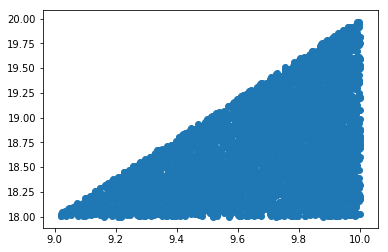

In [90]:
plt.scatter(x=x, y=y)

In [43]:
grade_age = list(filter(lambda x: x[1]/x[0] > 1.99, grade_age))
x,y = zip(*grade_age)

NameError: name 'grade_age' is not defined

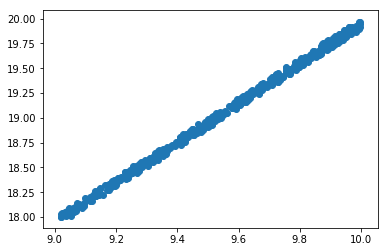

In [92]:
plt.scatter(x=x, y=y)

## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [2]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [3]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [4]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [5]:
print(b.shape)                   
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [6]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [7]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [8]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [9]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [10]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.49466724 0.22695025]
 [0.23129596 0.68317444]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [11]:
import numpy as np

# Create the following array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# We can use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):

# [[2 3]
# [6 7]]

b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [12]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [13]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape) 
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [14]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [15]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [16]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [17]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [18]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [19]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [21]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [225]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [226]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [227]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [228]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [229]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [230]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [231]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [232]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [23]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

ValueError: shapes (4,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [24]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

ValueError: shapes (4,3) and (4,3) not aligned: 3 (dim 1) != 4 (dim 0)

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [25]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [26]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [27]:
v = np.array([[1,2,3]])
print(v) 
print(v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [37]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x


# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[20  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[21  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [240]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [241]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [242]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [64]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider the shape of these arrays:
* M.shape = (2,3)
* a.shape = (3,)

By rule 1, prepend the rank of a by 1. The new shapes thus are:
* M.shape = (2,3)
* a.shape = (1,3)

Now by rule 5, copy the dimensions to make the arrays compatible
* M.shape = (2,3)
* a.shape = (2,3)


In [65]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [38]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [39]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [40]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [41]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [42]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## An example

### Finding Nearest Neighbours

In [84]:
x= np.float64(np.random.randint(0, 5,(4,3) ))
print(x.shape)

(4, 3)


* Without broadcasting, we can write is using loops

In [91]:
''' 
minDistances = []

def cmp(a,b):
    for i in range(len(a)):
        if(a[i]!=b[i]):
            return False
        

def distance(x,y):
    dist = 0
    for i in range(len(x)):
        dist += (x[i]-y[i])**2
    return np.sqrt(dist)

for i in range(len(x)):
    minDist = 10000
    for j in range(len(x)):
        if(cmp(x[i],x[j])):
            continue
        if(minDist>distance(x[i],x[j])):
            minDist = j
    minDistances.append(minDist)
        
print(minDistances)    

'''

'minDistances = []\n\ndef cmp(a,b):\n    for i in range(len(a)):\n        if(a[i]!=b[i]):\n            return False\n        \n\ndef distance(x,y):\n    dist = 0\n    for i in range(len(x)):\n        dist += (x[i]-y[i])**2\n    return np.sqrt(dist)\n\nfor i in range(len(x)):\n    minDist = 10000\n    for j in range(len(x)):\n        if(cmp(x[i],x[j])):\n            continue\n        if(minDist>distance(x[i],x[j])):\n            minDist = j\n    minDistances.append(minDist)\n        \nprint(minDistances)    \n'

In [68]:
x

array([[3., 4., 3.],
       [0., 1., 1.],
       [1., 1., 2.],
       [1., 2., 3.]])

In [69]:
x.reshape(4,1,3)

array([[[3., 4., 3.]],

       [[0., 1., 1.]],

       [[1., 1., 2.]],

       [[1., 2., 3.]]])

In [70]:
difference = x.reshape(4,1,3) - x

Let's just analyse what happened.

    *x.reshape(4,1,3) has the shape (4,1,3)
    *              x has the shape (4,3)
               
Rule 1 says to prepend rank of x by 1
So,
    * x.reshape(4,1,3).shape  = (4,1,3)
    * x.shape = (1,4,3)
    
Now using rule 5, shapes become:
    
    * x.reshape(4,1,3).shape  = (4,4,3)
    * x.shape = (4,4,3)
    


In [71]:
difference

array([[[ 0.,  0.,  0.],
        [ 3.,  3.,  2.],
        [ 2.,  3.,  1.],
        [ 2.,  2.,  0.]],

       [[-3., -3., -2.],
        [ 0.,  0.,  0.],
        [-1.,  0., -1.],
        [-1., -1., -2.]],

       [[-2., -3., -1.],
        [ 1.,  0.,  1.],
        [ 0.,  0.,  0.],
        [ 0., -1., -1.]],

       [[-2., -2.,  0.],
        [ 1.,  1.,  2.],
        [ 0.,  1.,  1.],
        [ 0.,  0.,  0.]]])

In [77]:
D = np.sum(np.square(difference), axis=2)
D.shape

(4, 4)

In [78]:
D


array([[ 0., 22., 14.,  8.],
       [22.,  0.,  2.,  6.],
       [14.,  2.,  0.,  2.],
       [ 8.,  6.,  2.,  0.]])

In [79]:
i= np.arange(4)
D[i,i] = np.inf
D

array([[inf, 22., 14.,  8.],
       [22., inf,  2.,  6.],
       [14.,  2., inf,  2.],
       [ 8.,  6.,  2., inf]])

In [80]:
j = np.argmin(D,1)
j[:], j.shape

(array([3, 2, 1, 2]), (4,))

#### Bigger Example


In [81]:
x= np.float64(np.random.randint(0, 100,(1000,3) ))
diff = x.reshape(1000,1,3) - x
D = np.sum(np.square(diff), axis=2)
i= np.arange(1000)
D[i,i] = np.inf
j = np.argmin(D,1)
j[:10], j.shape

(array([163, 258, 635, 690, 769, 435, 180, 694, 987, 252]), (1000,))